     tiempo  posición
0  0.000000  0.206947
1  0.001563  0.233274
2  0.003125  0.260480
3  0.004688  0.288290
4  0.006250  0.312052


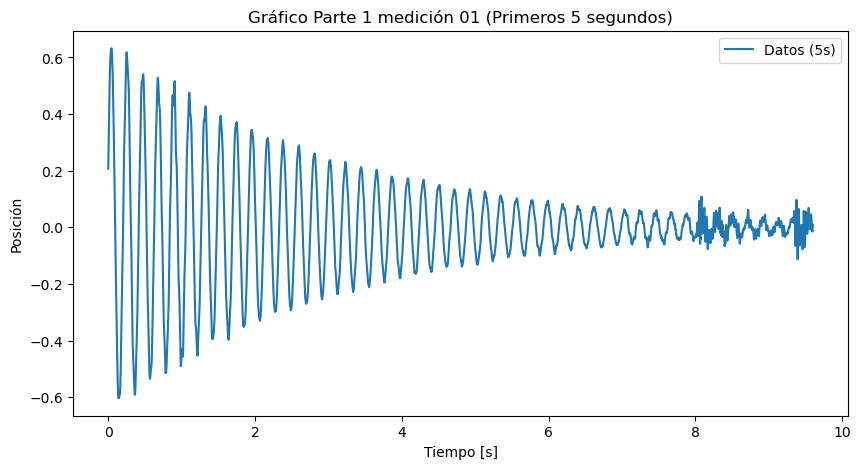

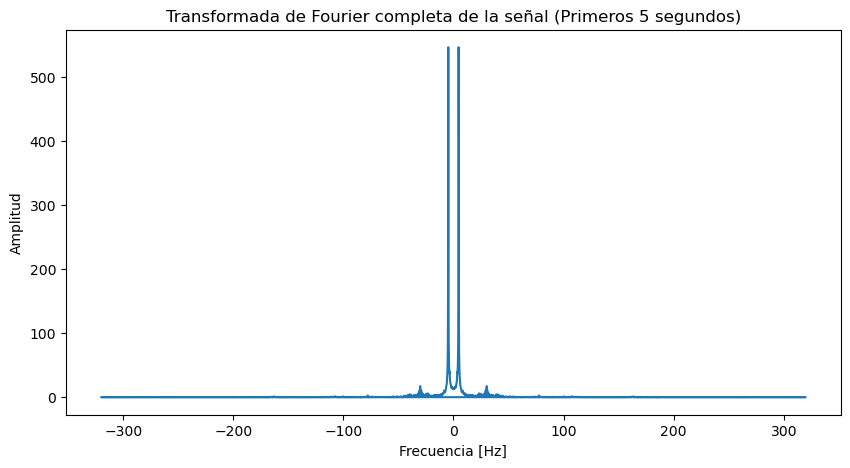

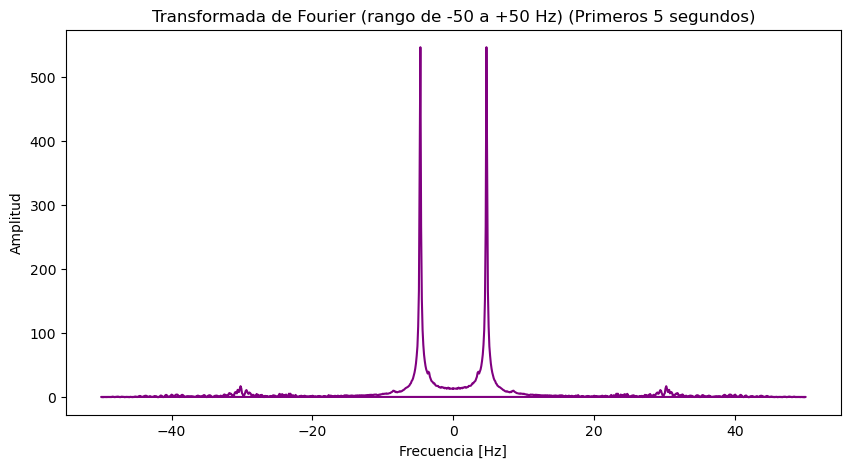

Frecuencia pico: 4.69 Hz, Amplitud: 546.84
Frecuencia pico: -4.69 Hz, Amplitud: 546.84


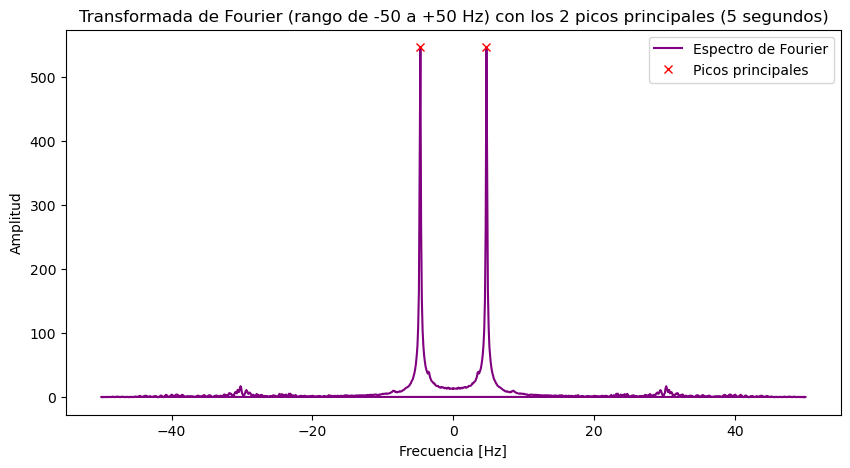

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
def obtener_frecuencia(path, time):
    # Cargar los datos
    tabla = pd.read_csv(
        path, 
        sep="\t", 
        names=["tiempo", "posición"]
    )
    print(tabla.head())

    # Filtrar los primeros 5 segundos
    tabla_5s = tabla[tabla["tiempo"] <= time]

    # Gráfico de amplitud vs. tiempo (solo primeros 5 segundos)
    plt.figure(figsize=(10, 5))
    plt.title("Gráfico Parte 1 medición 01 (Primeros 5 segundos)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Posición")
    plt.plot(tabla_5s["tiempo"], tabla_5s["posición"], color="tab:blue", label="Datos (5s)")
    plt.legend()
    plt.show()

    # Transformada de Fourier
    # Definir la señal y la frecuencia de muestreo para los primeros 5 segundos
    signal = tabla_5s["posición"].values
    time = tabla_5s["tiempo"].values
    sampling_rate = 1 / np.mean(np.diff(time))  # Calcular la frecuencia de muestreo

    # Aplicar la transformada de Fourier
    fft_values = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)

    # Graficar la amplitud en función de la frecuencia, incluyendo la parte negativa
    plt.figure(figsize=(10, 5))
    plt.title("Transformada de Fourier completa de la señal (Primeros 5 segundos)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq, np.abs(fft_values))  # Muestra la transformada completa
    plt.show()

    # Gráfico de transformada de Fourier en el rango de -50 a +50 Hz
    # Seleccionar solo el rango deseado
    mask = (fft_freq >= -50) & (fft_freq <= 50)
    fft_freq_rango = fft_freq[mask]
    fft_values_rango = np.abs(fft_values[mask])

    plt.figure(figsize=(10, 5))
    plt.title("Transformada de Fourier (rango de -50 a +50 Hz) (Primeros 5 segundos)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq_rango, fft_values_rango, color="purple")
    plt.show()

    # Encontrar los picos en el espectro de Fourier (en el rango de -50 a +50 Hz)
    peaks, properties = find_peaks(fft_values_rango, height=0)

    # Obtener las frecuencias y amplitudes correspondientes a los picos
    frecuencias_peaks = fft_freq_rango[peaks]
    amplitudes_peaks = fft_values_rango[peaks]

    # Seleccionar los dos picos de mayor amplitud
    indices_top2 = np.argsort(amplitudes_peaks)[-2:]  # Obtener los índices de los 2 picos más altos
    frecuencias_top2 = frecuencias_peaks[indices_top2]
    amplitudes_top2 = amplitudes_peaks[indices_top2]

    # Imprimir los dos picos de mayor amplitud
    for f, a in zip(frecuencias_top2, amplitudes_top2):
        print(f"Frecuencia pico: {f:.2f} Hz, Amplitud: {a:.2f}")

    # Opcional: Graficar el espectro con los dos picos de mayor amplitud
    plt.figure(figsize=(10, 5))
    plt.title("Transformada de Fourier (rango de -50 a +50 Hz) con los 2 picos principales (5 segundos)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq_rango, fft_values_rango, color="purple", label="Espectro de Fourier")
    plt.plot(frecuencias_top2, amplitudes_top2, "rx", label="Picos principales")  # Marcar los picos con una 'x' roja
    plt.legend()
    plt.show()
